In [1]:
a=[6,3,8,'hi',76,'exam']
b=['First',65,78]
c=a+b
print(c)

[6, 3, 8, 'hi', 76, 'exam', 'First', 65, 78]


In [2]:
import pandas as pd

data = {'Product': ['A', 'B', 'C', 'D', 'E','F'],
         'Quality': [3, 4, 1, 6, 3,8],
        'Price':[34000,3244,5645,7587,7858,4572]    
        }

df = pd.DataFrame(data)
df

,Price,Product,Quality
0,34000,A,3
1,3244,B,4
2,5645,C,1
3,7587,D,6
4,7858,E,3
5,4572,F,8


In [3]:
def binary_fun(x):
    if x<=5:
        return 0
    else:
        return 1
    

In [4]:
df1=df
df1

,Price,Product,Quality
0,34000,A,3
1,3244,B,4
2,5645,C,1
3,7587,D,6
4,7858,E,3
5,4572,F,8


In [5]:
df1['Quality']=df1['Quality'].apply(binary_fun)
df1

,Price,Product,Quality
0,34000,A,0
1,3244,B,0
2,5645,C,0
3,7587,D,1
4,7858,E,0
5,4572,F,1


In [6]:
##alternate way
import pandas as pd

data = {'Product': ['A', 'B', 'C', 'D', 'E','F'],
         'Quality': [3, 4, 1, 6, 3,8],
        'Price':[34000,3244,5645,7587,7858,4572]    
        }

df = pd.DataFrame(data)
df2=df
df2['Quality']=df2.apply(lambda x:binary_fun(x['Quality']),axis=1)
df2

,Price,Product,Quality
0,34000,A,0
1,3244,B,0
2,5645,C,0
3,7587,D,1
4,7858,E,0
5,4572,F,1


In [7]:
##Case study 2

In [8]:
##customer profiling user K means cluster Analysis

In [9]:
## Required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
##Data loading
data = pd.read_csv('Merchant_Users_data.csv')
data.head()

,userID,merchant,spend,transactions
0,3843,TacoBell,54.06,9
1,3812,Hotels.com,655.20,4
2,1693,OliveGarden,45.64,1
3,3812,Facebook,20.00,2
4,8973,Applebees,38.00,2


In [11]:
##EDA
#Summary of data
data1=data[['userID','spend','transactions']]
data1.head()

,userID,spend,transactions
0,3843,54.06,9
1,3812,655.20,4
2,1693,45.64,1
3,3812,20.00,2
4,8973,38.00,2


In [12]:
##Summary of data
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userID,1852.0,6206.282397,2752.295688,44.00,3813.0000,7057.0,8396.000,9922.00
spend,1852.0,468.277640,978.275990,2.68,44.4325,119.0,417.805,11426.25
transactions,1852.0,12.361771,30.323144,1.00,2.0000,4.0,11.000,642.00


In [13]:
##The dataset consists of 1852 rows. The average amount spend by customer is 468 and the average transactios is 12.

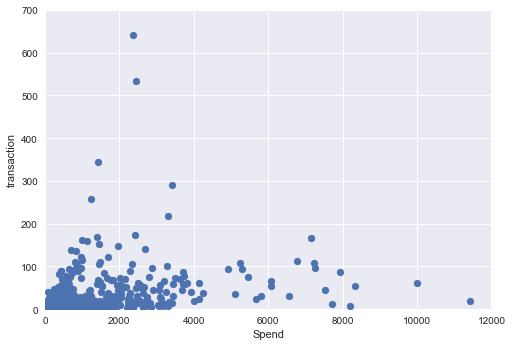

In [14]:
##scattter plot
data3=data[['spend','transactions']]
plt.scatter(data3['spend'],data3['transactions'])
plt.xlim(1,12000)
plt.ylim(1,700)
plt.xlabel('Spend')
plt.ylabel('transaction')
plt.show()

In [15]:
#Most of the users has spend less than 2000 amount on 60-70 transactions
#There are very few users who has spend more than 8000 on 60-70 transaction

In [16]:
##Find correct no of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(data3)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

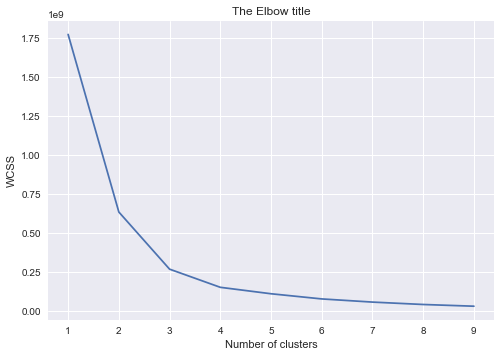

In [17]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#we can chose 4 or 5 as after 4 WCSS is less

In [19]:
##Let us try both the number of clusters and visualize the clusters to decide on the final number of clusters

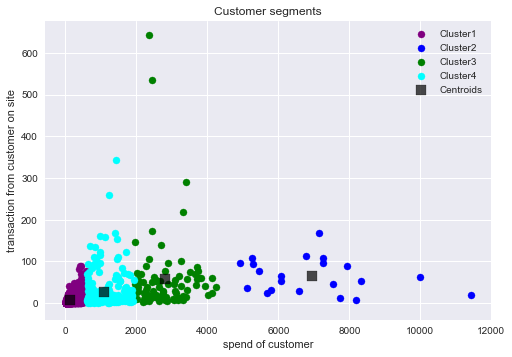

In [20]:
## Number of clusters=4
kmeans_4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
identified_clusters_4 = kmeans_4.fit_predict(data3)
data_with_clusters = data3.copy()
data_with_clusters['Clusters'] = identified_clusters_4
X=data_with_clusters.copy()
#Visualizing the clusters for k=4
plt.scatter(X[X.Clusters==0].spend,X[X.Clusters==0].transactions,s=50, c='purple',label='Cluster1')
plt.scatter(X[X.Clusters==1].spend,X[X.Clusters==1].transactions,s=50, c='blue',label='Cluster2')
plt.scatter(X[X.Clusters==2].spend,X[X.Clusters==2].transactions,s=50, c='green',label='Cluster3')
plt.scatter(X[X.Clusters==3].spend,X[X.Clusters==3].transactions,s=50, c='cyan',label='Cluster4')
plt.scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1],s=100,marker='s', c='black', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('spend of customer')
plt.ylabel('transaction from customer on site')
plt.legend()
plt.show()

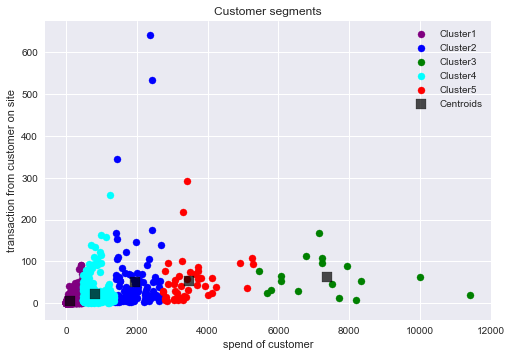

In [21]:
## Number of clusters=5
kmeans_5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
identified_clusters_5 = kmeans_5.fit_predict(data3)
data_with_clusters_5 = data3.copy()
data_with_clusters_5['Clusters'] = identified_clusters_5
X=data_with_clusters_5.copy()
#Visualizing the clusters for k=4
plt.scatter(X[X.Clusters==0].spend,X[X.Clusters==0].transactions,s=50, c='purple',label='Cluster1')
plt.scatter(X[X.Clusters==1].spend,X[X.Clusters==1].transactions,s=50, c='blue',label='Cluster2')
plt.scatter(X[X.Clusters==2].spend,X[X.Clusters==2].transactions,s=50, c='green',label='Cluster3')
plt.scatter(X[X.Clusters==3].spend,X[X.Clusters==3].transactions,s=50, c='cyan',label='Cluster4')
plt.scatter(X[X.Clusters==4].spend,X[X.Clusters==4].transactions,s=50, c='red',label='Cluster5')
plt.scatter(kmeans_5.cluster_centers_[:,0], kmeans_5.cluster_centers_[:,1],s=100,marker='s', c='black', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('spend of customer')
plt.ylabel('transaction from customer on site')
plt.legend()
plt.show()

In [22]:
##If we use K=4 then we can see more clear grouping than if we use k=5

In [23]:
#Lets find what kind of userid are clubbed together
merch_data = pd.read_csv('Merchant_data.csv')
merch_data['merchant']=merch_data['Merchant']
data_with_clusters_44=data.copy()
data_with_clusters_44['Clusters'] = identified_clusters_4
final_data_5=pd.merge(data_with_clusters_44,merch_data,on=['merchant'])

cluster1=final_data_5[final_data_5.Clusters==0]
cluster2=final_data_5[final_data_5.Clusters==1]
cluster3=final_data_5[final_data_5.Clusters==2]
cluster4=final_data_5[final_data_5.Clusters==3]

In [24]:
##Case study 3-find out whether customer churn or not-classification

In [25]:
##Logistc Regression

from sklearn.linear_model import LogisticRegression

In [26]:
customer_churn = pd.read_csv('customer_chrun.csv')
customer_churn.head()
print('Number of rows: ', customer_churn.shape[0])
print("Number of Columns:", customer_churn.shape[1])
print(customer_churn.columns.tolist())
print("\nMissing values:", customer_churn.isnull().sum().values.sum())
print("\nUnique values:")
print(customer_churn.nunique())

Number of rows:  7043
Number of Columns: 21
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [27]:

##there are 7043 rows and 21 columns in the dara set.
##There are 17 categorical features such as Gneder, Seniorcitizen, Partner, etc. and Target variable Churn: Whether the customer churned or not

##there are 3 numerical features:Tenure:MonthlyCharges: TotalCharges:


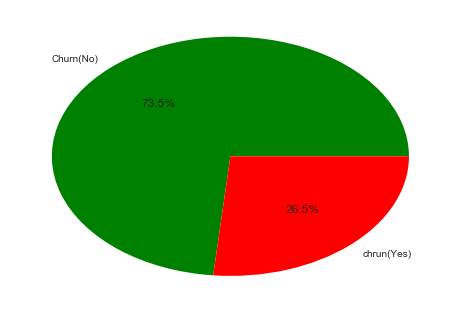

In [28]:
### Lets check what is the dirtibution of Target varaible
Churn = customer_churn['Churn'].tolist()
Churn_no = Churn.count('No')
Churn_yes = Churn.count("Yes")
labels = 'Churn(No)', 'chrun(Yes)'
sizes = [Churn_no, Churn_yes]
colors = ( "Green", "Red") 

# explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',colors=colors)
plt.show()

In [29]:
### Lets check what is the dirtibution of Target varaible
##We have to predict users will leave the company or not. It’s a binary classification problem with an unbalanced target.
##Churn: No – 73.5%
##Churn: Yes – 26.5%

In [30]:
##Demographic analysis-SeniorCitizen, Gender, Partner, Depentent

In [31]:
gender_chrun = customer_churn.groupby(['gender', 'Churn']).size().reset_index()
customer_churn.loc[customer_churn.SeniorCitizen==0,'SeniorCitizen'] = "No"
customer_churn.loc[customer_churn.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
seniorcitizen_chrun = customer_churn.groupby(['SeniorCitizen', 'Churn']).size().reset_index()
seniorcitizen_chrun
Partner_chrun = customer_churn.groupby(['Partner', 'Churn']).size().reset_index()
Dependents_chrun = customer_churn.groupby(['Dependents', 'Churn']).size().reset_index()
seniorcitizen_chrun
##There is higher proportion of churn in younger customers than SeniorCitizen

,SeniorCitizen,Churn,0
0,No,No,4508
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


In [32]:
Partner_chrun
##There is higher proportion of churn in younger customers than SeniorCitizen

,Partner,Churn,0
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


In [33]:
Dependents_chrun
##There is higher proportion of churn in younger customers than SeniorCitizen

,Dependents,Churn,0
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


In [34]:
gender_chrun
####The difference in churn is slightly more in females, but the small difference can be ignored

,gender,Churn,0
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


In [35]:
##We can use bar digram
# n_groups = 2
# female= (2549, 939)
# male = (2625, 939)

# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index, female, male,alpha=opacity,color='Red',label='Female')

# rects2 = plt.bar(index + bar_width, male, bar_width,alpha=opacity,color='green',label='Male')

# plt.xlabel('Person')
# plt.ylabel('Scores')
# plt.title('Scores by person')
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
# plt.legend()

# plt.tight_layout()
# plt.show()

In [36]:
##simliarly we can check other varibales

In [37]:
# Data Preprocessing
##check datatypes of the columns

customer_churn.dtypes

##total charge varibale id numeric but its type showning as Object.


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
#Summary of data
customer_churn.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [39]:
# customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)
# customer_churn['TotalCharges'].isnull().count()
## THERE IS some ISSUE WITH SOME records. Let convert the data into numerical vlaue



##ERROR:could not convert string to float: 



In [40]:
##covert string data into numerical and replace missing records with some values
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'],errors='coerce')
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median())

#Summary of data after replacing null values
customer_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [41]:
#we dont need customerID column. 

customer_churn.drop(["customerID"],axis=1)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [42]:
# Covert categorical variables

#Defining the convert function
def convert(col):
    return col.map({'Yes':1, 'No':0})

list_col=['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
list_col1=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
customer_churn[list_col] = customer_churn[list_col].apply(convert)
customer_churn['gender'] = customer_churn['gender'].map({'Male':1, 'Female':0})
customer_churn['MultipleLines'] = pd.get_dummies(customer_churn['MultipleLines'], drop_first=True)
customer_churn['InternetService'] = pd.get_dummies(customer_churn['InternetService'], drop_first=True)
customer_churn['OnlineSecurity'] = pd.get_dummies(customer_churn['OnlineSecurity'], drop_first=True)
customer_churn['OnlineBackup'] = pd.get_dummies(customer_churn['OnlineBackup'], drop_first=True)
customer_churn['DeviceProtection'] = pd.get_dummies(customer_churn['DeviceProtection'], drop_first=True)
customer_churn['TechSupport'] = pd.get_dummies(customer_churn['TechSupport'], drop_first=True)
customer_churn['StreamingTV'] = pd.get_dummies(customer_churn['StreamingTV'], drop_first=True)
customer_churn['StreamingMovies'] = pd.get_dummies(customer_churn['StreamingMovies'], drop_first=True)
customer_churn['Contract'] = pd.get_dummies(customer_churn['Contract'], drop_first=True)
customer_churn['Contract'] = pd.get_dummies(customer_churn['Contract'], drop_first=True)
customer_churn['PaymentMethod'] = pd.get_dummies(customer_churn['PaymentMethod'], drop_first=True)
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,0,...,0,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,0,...,0,0,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,0,1,0,...,0,0,0,0,0,1,0,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,0,1,0,...,0,0,0,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,0,...,0,0,0,0,0,0,0,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,0,1,0,...,0,0,0,0,0,1,0,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,0,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = customer_churn.drop('Churn', axis=1)
X = X.drop('customerID', axis=1)
y = customer_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
model = LogisticRegression()
print("model: ",model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
acc_score
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred)                            
print("recall: ",rec_score)
y_act_list=y_test.tolist()
y_pred_list=y_pred.tolist()

model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy:  0.789398958826
precision:  0.618644067797
recall:  0.524236983842


In [44]:
##Accuracy of the model is around 79% which is good 
##which means that if there are 100 records then 79 records are classified correctly.

##Precision of the model is around 60% which is good
##which means that if there are 50 records out of 100  are positive in the data and  then around 30 records are classified correctly as positive.

In [45]:

# df1 = pd.DataFrame(y_act_list, columns=['y_Actual'])
# df2 = pd.DataFrame(y_pred_list, columns=['y_Predicted'])
# frames = [df1, df2]
# df = pd.concat(frames)
# df
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
# print (confusion_matrix)